In [10]:
!python simSumoCmd.py

/bin/sh: 1: python: not found


In [ ]:
a= np.array([[1,2],[3,4],[100,99],[5,9]])
a[np.where(a[:,0]<6)]
a[:,0]<6

[71.1  12.77]
[[0.99 0.0]
 [44.81 13.59]
 [71.1 12.77]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0.0 0.0]
 [0 0]]


simStop:next tls,edge is (),e2to3

 simNum:0
running time(ms):60200,tls state: G,duration:20.000,speed:4.62,lanePos:0.02195913490262455,dist2TLS:199.98,edgeID is e2to3, TLS is (),
ID:d2,vehPos:7.38,speed:4.75,vehLanePos:7.376592946554493,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:1
running time(ms):60100,tls state: G,duration:20.000,speed:4.59,lanePos:0.05068878432734891,dist2TLS:199.95,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.27,speed:4.75,vehLanePos:7.270385524039199,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:2
running time(ms):60300,tls state: G,duration:20.000,speed:4.59,lanePos:199.90275568359306,dist2TLS:0.10,edgeID is e1to2, TLS is (('2', 0, 0.0972443164069432, 'G'),),
ID:d2,vehPos:7.22,speed:4.76,vehLanePos:7.218073495511842,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:3
running time(ms):60300,tls state: G,duration:20.000,speed:4.57,lanePos:199.84580867529843,dist2TLS:0.15,edgeID

simStop:dist2TLS<=0.3

 simNum:4
running time(ms):60200,tls state: G,duration:20.000,speed:4.59,lanePos:199.80815882613246,dist2TLS:0.19,edgeID is e1to2, TLS is (('2', 0, 0.1918411738675445, 'G'),),
ID:d2,vehPos:6.96,speed:4.75,vehLanePos:6.958403262463642,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:5
running time(ms):60100,tls state: G,duration:20.000,speed:4.59,lanePos:199.76988845454576,dist2TLS:0.23,edgeID is e1to2, TLS is (('2', 0, 0.2301115454542355, 'G'),),
ID:d2,vehPos:7.02,speed:4.76,vehLanePos:7.023148427870934,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:6
running time(ms):60300,tls state: G,duration:20.000,speed:4.58,lanePos:0.021843770256396056,dist2TLS:199.98,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.44,speed:4.77,vehLanePos:7.435600143511479,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:7
running time(ms):60000,tls state: G,duration:20.000,speed:4.65,lanePos:199.72794312055936,

simStop:next tls,edge is (),:2_0

 simNum:8
running time(ms):60400,tls state: G,duration:20.000,speed:4.58,lanePos:0.004657406536352937,dist2TLS:200.00,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.35,speed:4.76,vehLanePos:7.353738942650234,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:9
running time(ms):60100,tls state: G,duration:20.000,speed:4.66,lanePos:0.04554497768458532,dist2TLS:199.95,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.62,speed:4.77,vehLanePos:7.620531758053037,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:10
running time(ms):60300,tls state: G,duration:20.000,speed:4.59,lanePos:199.98939638584469,dist2TLS:0.01,edgeID is e1to2, TLS is (('2', 0, 0.010603614155314744, 'G'),),
ID:d2,vehPos:7.18,speed:4.74,vehLanePos:7.178364308023281,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:11
running time(ms):60300,tls state: G,duration:20.000,speed:4.58,lanePos:199.9102839215224,dist2TLS:0.09,edge

simStop:dist2TLS<=0.3

 simNum:12
running time(ms):60200,tls state: G,duration:20.000,speed:4.57,lanePos:199.72410085119083,dist2TLS:0.28,edgeID is e1to2, TLS is (('2', 0, 0.27589914880917377, 'G'),),
ID:d2,vehPos:7.07,speed:4.75,vehLanePos:7.065109177467934,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:13
running time(ms):60400,tls state: G,duration:20.000,speed:4.56,lanePos:199.90895716269242,dist2TLS:0.09,edgeID is e1to2, TLS is (('2', 0, 0.09104283730758311, 'G'),),
ID:d2,vehPos:7.32,speed:4.75,vehLanePos:7.315412955158607,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),e2to3

 simNum:14
running time(ms):60100,tls state: G,duration:20.000,speed:4.64,lanePos:0.0013022305699848802,dist2TLS:200.00,edgeID is e2to3, TLS is (),
ID:d2,vehPos:7.39,speed:4.76,vehLanePos:7.385119243635937,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:15
running time(ms):60300,tls state: G,duration:20.000,speed:4.60,lanePos

simStop:dist2TLS<=0.3

 simNum:16
running time(ms):60100,tls state: G,duration:20.000,speed:4.58,lanePos:199.99024022128478,dist2TLS:0.01,edgeID is e1to2, TLS is (('2', 0, 0.009759778715221046, 'G'),),
ID:d2,vehPos:7.29,speed:4.75,vehLanePos:7.294421975420311,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:17
running time(ms):60300,tls state: G,duration:20.000,speed:4.57,lanePos:199.7609848533164,dist2TLS:0.24,edgeID is e1to2, TLS is (('2', 0, 0.239015146683613, 'G'),),
ID:d2,vehPos:7.18,speed:4.77,vehLanePos:7.177459965287588,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:18
running time(ms):60500,tls state: G,duration:20.000,speed:4.55,lanePos:0.06727094241705345,dist2TLS:199.93,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.45,speed:4.73,vehLanePos:7.454257436465096,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:19
running time(ms):60100,tls state: G,duration:20.000,speed:4.59,lanePos:199.973246089147

simStop:next tls,edge is (),:2_0

 simNum:20
running time(ms):60300,tls state: G,duration:20.000,speed:4.60,lanePos:0.0858928410966655,dist2TLS:199.91,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.48,speed:4.74,vehLanePos:7.475799593449645,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:21
running time(ms):60200,tls state: G,duration:20.000,speed:4.60,lanePos:0.053151363770297166,dist2TLS:199.95,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.30,speed:4.77,vehLanePos:7.297660085121383,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:22
running time(ms):60300,tls state: G,duration:20.000,speed:4.56,lanePos:0.05262352191400055,dist2TLS:199.95,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.54,speed:4.75,vehLanePos:7.535554677872383,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:23
running time(ms):60100,tls state: G,duration:20.000,speed:4.57,lanePos:199.75200572986964,dist2TLS:0.25,edgeID is e1to2, TLS is (

simStop:dist2TLS<=0.3

 simNum:24
running time(ms):60200,tls state: G,duration:20.000,speed:4.58,lanePos:199.92964900095902,dist2TLS:0.07,edgeID is e1to2, TLS is (('2', 0, 0.07035099904098274, 'G'),),
ID:d2,vehPos:7.36,speed:4.77,vehLanePos:7.361855026052552,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:25
running time(ms):60300,tls state: G,duration:20.000,speed:4.60,lanePos:199.99905248717087,dist2TLS:0.00,edgeID is e1to2, TLS is (('2', 0, 0.0009475128291285273, 'G'),),
ID:d2,vehPos:7.14,speed:4.75,vehLanePos:7.136008712692028,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:26
running time(ms):60000,tls state: G,duration:20.000,speed:4.59,lanePos:199.92830676412072,dist2TLS:0.07,edgeID is e1to2, TLS is (('2', 0, 0.07169323587928034, 'G'),),
ID:d2,vehPos:7.17,speed:4.75,vehLanePos:7.167398263666409,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:27
running time(ms):60100,tls state: G,duration:20.000,speed:4.5

simStop:next tls,edge is (),:2_0

 simNum:28
running time(ms):60300,tls state: G,duration:20.000,speed:4.57,lanePos:0.06553645608528313,dist2TLS:199.93,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.33,speed:4.74,vehLanePos:7.327852798448904,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:29
running time(ms):60100,tls state: G,duration:20.000,speed:4.57,lanePos:0.0457235211534055,dist2TLS:199.95,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.48,speed:4.75,vehLanePos:7.477873163237923,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:30
running time(ms):60100,tls state: G,duration:20.000,speed:4.59,lanePos:199.7495650275171,dist2TLS:0.25,edgeID is e1to2, TLS is (('2', 0, 0.2504349724829069, 'G'),),
ID:d2,vehPos:6.98,speed:4.76,vehLanePos:6.976709146112411,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:31
running time(ms):60200,tls state: G,duration:20.000,speed:4.58,lanePos:199.84975658424008,dist2TLS:0.15,edgeID

simStop:next tls,edge is (),e2to3

 simNum:32
running time(ms):60400,tls state: G,duration:20.000,speed:4.55,lanePos:0.0017573315408526413,dist2TLS:200.00,edgeID is e2to3, TLS is (),
ID:d2,vehPos:7.55,speed:4.74,vehLanePos:7.5542254669244535,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),e2to3

 simNum:33
running time(ms):60300,tls state: G,duration:20.000,speed:4.56,lanePos:0.0034090771545947918,dist2TLS:200.00,edgeID is e2to3, TLS is (),
ID:d2,vehPos:7.57,speed:4.75,vehLanePos:7.5742180257615335,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),e2to3

 simNum:34
running time(ms):60200,tls state: G,duration:20.000,speed:4.60,lanePos:0.02220642505991463,dist2TLS:199.98,edgeID is e2to3, TLS is (),
ID:d2,vehPos:7.51,speed:4.75,vehLanePos:7.514007668248427,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:35
running time(ms):60300,tls state: G,duration:20.000,speed:4.57,lanePos:0.012219533414025818,dist2TLS:199.9

simStop:dist2TLS<=0.3

 simNum:36
running time(ms):60200,tls state: G,duration:20.000,speed:4.59,lanePos:199.8854697904831,dist2TLS:0.11,edgeID is e1to2, TLS is (('2', 0, 0.11453020951688586, 'G'),),
ID:d2,vehPos:7.06,speed:4.74,vehLanePos:7.06389865278976,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:37
running time(ms):60300,tls state: G,duration:20.000,speed:4.59,lanePos:199.84814853766431,dist2TLS:0.15,edgeID is e1to2, TLS is (('2', 0, 0.15185146233568503, 'G'),),
ID:d2,vehPos:7.03,speed:4.75,vehLanePos:7.03319815136379,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:38
running time(ms):60100,tls state: G,duration:20.000,speed:4.74,lanePos:0.01989355865600828,dist2TLS:199.98,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.37,speed:4.76,vehLanePos:7.370603878133693,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:39
running time(ms):60000,tls state: G,duration:20.000,speed:4.69,lanePos:199.7566699162572

simStop:dist2TLS<=0.3

 simNum:40
running time(ms):60200,tls state: G,duration:20.000,speed:4.59,lanePos:199.8391829334135,dist2TLS:0.16,edgeID is e1to2, TLS is (('2', 0, 0.1608170665865032, 'G'),),
ID:d2,vehPos:7.13,speed:4.77,vehLanePos:7.126116025144182,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:41
running time(ms):60200,tls state: G,duration:20.000,speed:4.58,lanePos:199.91680897207678,dist2TLS:0.08,edgeID is e1to2, TLS is (('2', 0, 0.08319102792322042, 'G'),),
ID:d2,vehPos:7.35,speed:4.77,vehLanePos:7.351694414459279,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:42
running time(ms):60100,tls state: G,duration:20.000,speed:4.59,lanePos:0.04772695153135942,dist2TLS:199.95,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.41,speed:4.74,vehLanePos:7.407318134970508,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:43
running time(ms):60400,tls state: G,duration:20.000,speed:4.58,lanePos:0.051

simStop:dist2TLS<=0.3

 simNum:44
running time(ms):60100,tls state: G,duration:20.000,speed:4.65,lanePos:199.9865639138511,dist2TLS:0.01,edgeID is e1to2, TLS is (('2', 0, 0.013436086148885806, 'G'),),
ID:d2,vehPos:7.37,speed:4.74,vehLanePos:7.367902392771228,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:45
running time(ms):60200,tls state: G,duration:20.000,speed:4.58,lanePos:199.86116670050717,dist2TLS:0.14,edgeID is e1to2, TLS is (('2', 0, 0.13883329949283052, 'G'),),
ID:d2,vehPos:7.12,speed:4.74,vehLanePos:7.115553903128279,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:46
running time(ms):60200,tls state: G,duration:20.000,speed:4.59,lanePos:0.054648477001762785,dist2TLS:199.95,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.36,speed:4.76,vehLanePos:7.356347112662862,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),e2to3

 simNum:47
running time(ms):60200,tls state: G,duration:20.000,speed:4.59,lanePos:0

simStop:dist2TLS<=0.3

 simNum:48
running time(ms):60000,tls state: G,duration:20.000,speed:4.58,lanePos:199.73002010315363,dist2TLS:0.27,edgeID is e1to2, TLS is (('2', 0, 0.26997989684636536, 'G'),),
ID:d2,vehPos:6.87,speed:4.74,vehLanePos:6.871618421639037,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:49
running time(ms):60200,tls state: G,duration:20.000,speed:4.57,lanePos:199.88938454894125,dist2TLS:0.11,edgeID is e1to2, TLS is (('2', 0, 0.1106154510587487, 'G'),),
ID:d2,vehPos:7.30,speed:4.75,vehLanePos:7.298250609934414,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:50
running time(ms):60000,tls state: G,duration:20.000,speed:4.60,lanePos:199.8425868731037,dist2TLS:0.16,edgeID is e1to2, TLS is (('2', 0, 0.1574131268963015, 'G'),),
ID:d2,vehPos:6.96,speed:4.74,vehLanePos:6.964134031723887,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:51
running time(ms):60100,tls state: G,duration:20.000,speed:4.62,lan

simStop:dist2TLS<=0.3

 simNum:52
running time(ms):60100,tls state: G,duration:20.000,speed:4.56,lanePos:199.7401745425321,dist2TLS:0.26,edgeID is e1to2, TLS is (('2', 0, 0.25982545746791175, 'G'),),
ID:d2,vehPos:7.04,speed:4.74,vehLanePos:7.038839386944868,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:53
running time(ms):60100,tls state: G,duration:20.000,speed:4.56,lanePos:199.72613090523834,dist2TLS:0.27,edgeID is e1to2, TLS is (('2', 0, 0.27386909476166466, 'G'),),
ID:d2,vehPos:7.14,speed:4.75,vehLanePos:7.14126670896112,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:54
running time(ms):60200,tls state: G,duration:20.000,speed:4.57,lanePos:199.96012472437425,dist2TLS:0.04,edgeID is e1to2, TLS is (('2', 0, 0.039875275625746553, 'G'),),
ID:d2,vehPos:7.22,speed:4.74,vehLanePos:7.215172956982945,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:55
running time(ms):60100,tls state: G,duration:20.000,speed:4.55,l

simStop:next tls,edge is (),:2_0

 simNum:56
running time(ms):60200,tls state: G,duration:20.000,speed:4.58,lanePos:0.0618647993173056,dist2TLS:199.94,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.44,speed:4.75,vehLanePos:7.437326706162026,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:57
running time(ms):60200,tls state: G,duration:20.000,speed:4.57,lanePos:199.9276035671312,dist2TLS:0.07,edgeID is e1to2, TLS is (('2', 0, 0.07239643286879982, 'G'),),
ID:d2,vehPos:7.23,speed:4.74,vehLanePos:7.230421116092149,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:58
running time(ms):60100,tls state: G,duration:20.000,speed:4.62,lanePos:199.9127920483137,dist2TLS:0.09,edgeID is e1to2, TLS is (('2', 0, 0.08720795168630957, 'G'),),
ID:d2,vehPos:7.10,speed:4.74,vehLanePos:7.096961546917004,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:59
running time(ms):60100,tls state: G,duration:20.000,speed:4.60,lanePos:199.8355164220564

simStop:dist2TLS<=0.3

 simNum:60
running time(ms):60000,tls state: G,duration:20.000,speed:4.58,lanePos:199.76658010181126,dist2TLS:0.23,edgeID is e1to2, TLS is (('2', 0, 0.23341989818874254, 'G'),),
ID:d2,vehPos:7.14,speed:4.76,vehLanePos:7.143852534127728,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),e2to3

 simNum:61
running time(ms):60400,tls state: G,duration:20.000,speed:4.57,lanePos:0.028315597450750823,dist2TLS:199.97,edgeID is e2to3, TLS is (),
ID:d2,vehPos:7.62,speed:4.76,vehLanePos:7.618490929598813,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:62
running time(ms):60300,tls state: G,duration:20.000,speed:4.56,lanePos:199.88020271262062,dist2TLS:0.12,edgeID is e1to2, TLS is (('2', 0, 0.11979728737938444, 'G'),),
ID:d2,vehPos:7.20,speed:4.74,vehLanePos:7.195941083163488,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:63
running time(ms):60100,tls state: G,duration:20.000,speed:4.58,lanePos:199.7012947

simStop:next tls,edge is (),:2_0

 simNum:64
running time(ms):60400,tls state: G,duration:20.000,speed:4.59,lanePos:0.07615860665208629,dist2TLS:199.92,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.19,speed:4.74,vehLanePos:7.187681517500984,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),e2to3

 simNum:65
running time(ms):60200,tls state: G,duration:20.000,speed:4.61,lanePos:0.027246016396412637,dist2TLS:199.97,edgeID is e2to3, TLS is (),
ID:d2,vehPos:7.33,speed:4.75,vehLanePos:7.32698382109975,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:66
running time(ms):60300,tls state: G,duration:20.000,speed:4.60,lanePos:0.07863316923589991,dist2TLS:199.92,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.23,speed:4.76,vehLanePos:7.230544716726488,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:67
running time(ms):60200,tls state: G,duration:20.000,speed:4.56,lanePos:199.97041140050416,dist2TLS:0.03,edgeID is e1to2, TLS is

simStop:dist2TLS<=0.3

 simNum:68
running time(ms):60300,tls state: G,duration:20.000,speed:4.59,lanePos:199.78269786757875,dist2TLS:0.22,edgeID is e1to2, TLS is (('2', 0, 0.21730213242125274, 'G'),),
ID:d2,vehPos:6.92,speed:4.75,vehLanePos:6.915757660940546,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:69
running time(ms):60300,tls state: G,duration:20.000,speed:4.57,lanePos:199.84970257645918,dist2TLS:0.15,edgeID is e1to2, TLS is (('2', 0, 0.15029742354082032, 'G'),),
ID:d2,vehPos:7.00,speed:4.73,vehLanePos:7.002544699907152,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:70
running time(ms):60100,tls state: G,duration:20.000,speed:4.61,lanePos:199.90066432450664,dist2TLS:0.10,edgeID is e1to2, TLS is (('2', 0, 0.0993356754933643, 'G'),),
ID:d2,vehPos:7.43,speed:4.74,vehLanePos:7.43296766136299,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:71
running time(ms):60300,tls state: G,duration:20.000,sp

simStop:next tls,edge is (),e2to3

 simNum:72
running time(ms):60400,tls state: G,duration:20.000,speed:4.58,lanePos:0.028119843662972238,dist2TLS:199.97,edgeID is e2to3, TLS is (),
ID:d2,vehPos:7.28,speed:4.73,vehLanePos:7.283991788327287,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:73
running time(ms):60200,tls state: G,duration:20.000,speed:4.56,lanePos:199.9219095284028,dist2TLS:0.08,edgeID is e1to2, TLS is (('2', 0, 0.07809047159719285, 'G'),),
ID:d2,vehPos:7.36,speed:4.74,vehLanePos:7.3559708017798275,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:74
running time(ms):60300,tls state: G,duration:20.000,speed:4.58,lanePos:199.75107996182604,dist2TLS:0.25,edgeID is e1to2, TLS is (('2', 0, 0.24892003817396358, 'G'),),
ID:d2,vehPos:6.93,speed:4.75,vehLanePos:6.933544171165966,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:75
running time(ms):60300,tls state: G,duration:20.000,speed:4.56,lanePos:199.9304261

simStop:dist2TLS<=0.3

 simNum:76
running time(ms):60000,tls state: G,duration:20.000,speed:4.58,lanePos:199.83442910437194,dist2TLS:0.17,edgeID is e1to2, TLS is (('2', 0, 0.16557089562806482, 'G'),),
ID:d2,vehPos:7.05,speed:4.74,vehLanePos:7.047348955319343,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:77
running time(ms):60100,tls state: G,duration:20.000,speed:4.58,lanePos:199.72401333593703,dist2TLS:0.28,edgeID is e1to2, TLS is (('2', 0, 0.27598666406296957, 'G'),),
ID:d2,vehPos:7.08,speed:4.76,vehLanePos:7.0820677533979275,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:78
running time(ms):60300,tls state: G,duration:20.000,speed:4.60,lanePos:199.9855220283031,dist2TLS:0.01,edgeID is e1to2, TLS is (('2', 0, 0.014477971696891245, 'G'),),
ID:d2,vehPos:7.40,speed:4.77,vehLanePos:7.399762467364783,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:79
running time(ms):60100,tls state: G,duration:20.000,speed:4.57

simStop:next tls,edge is (),e2to3

 simNum:80
running time(ms):60200,tls state: G,duration:20.000,speed:4.59,lanePos:0.017915984706741023,dist2TLS:199.98,edgeID is e2to3, TLS is (),
ID:d2,vehPos:7.53,speed:4.77,vehLanePos:7.533499349226441,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:81
running time(ms):60300,tls state: G,duration:20.000,speed:4.58,lanePos:199.79162269587061,dist2TLS:0.21,edgeID is e1to2, TLS is (('2', 0, 0.20837730412938527, 'G'),),
ID:d2,vehPos:7.17,speed:4.77,vehLanePos:7.174694464333436,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:82
running time(ms):60100,tls state: G,duration:20.000,speed:4.58,lanePos:199.98010295814953,dist2TLS:0.02,edgeID is e1to2, TLS is (('2', 0, 0.019897041850470032, 'G'),),
ID:d2,vehPos:7.30,speed:4.75,vehLanePos:7.29789290293942,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),e2to3

 simNum:83
running time(ms):60300,tls state: G,duration:20.000,speed:4.59,lanePos

simStop:dist2TLS<=0.3

 simNum:84
running time(ms):60200,tls state: G,duration:20.000,speed:4.58,lanePos:199.70030911139548,dist2TLS:0.30,edgeID is e1to2, TLS is (('2', 0, 0.2996908886045162, 'G'),),
ID:d2,vehPos:6.81,speed:4.74,vehLanePos:6.812048079625269,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:85
running time(ms):60300,tls state: G,duration:20.000,speed:4.57,lanePos:199.80856078716388,dist2TLS:0.19,edgeID is e1to2, TLS is (('2', 0, 0.19143921283611576, 'G'),),
ID:d2,vehPos:6.98,speed:4.73,vehLanePos:6.983887257871471,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:86
running time(ms):60200,tls state: G,duration:20.000,speed:4.58,lanePos:199.9521918392899,dist2TLS:0.05,edgeID is e1to2, TLS is (('2', 0, 0.04780816071010463, 'G'),),
ID:d2,vehPos:7.19,speed:4.74,vehLanePos:7.193215976407088,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:87
running time(ms):60300,tls state: G,duration:20.000,speed:4.57,la

simStop:dist2TLS<=0.3

 simNum:88
running time(ms):60300,tls state: G,duration:20.000,speed:4.58,lanePos:199.7285080736316,dist2TLS:0.27,edgeID is e1to2, TLS is (('2', 0, 0.27149192636841235, 'G'),),
ID:d2,vehPos:6.91,speed:4.75,vehLanePos:6.908061295332919,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:89
running time(ms):60100,tls state: G,duration:20.000,speed:4.62,lanePos:199.9058363517351,dist2TLS:0.09,edgeID is e1to2, TLS is (('2', 0, 0.09416364826489598, 'G'),),
ID:d2,vehPos:7.21,speed:4.74,vehLanePos:7.208373760929639,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:90
running time(ms):60100,tls state: G,duration:20.000,speed:4.56,lanePos:199.91203383444795,dist2TLS:0.09,edgeID is e1to2, TLS is (('2', 0, 0.0879661655520465, 'G'),),
ID:d2,vehPos:7.25,speed:4.74,vehLanePos:7.251976355765751,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),e2to3

 simNum:91
running time(ms):60100,tls state: G,duration:20.000,sp

simStop:dist2TLS<=0.3

 simNum:92
running time(ms):60300,tls state: G,duration:20.000,speed:4.58,lanePos:199.90323803579852,dist2TLS:0.10,edgeID is e1to2, TLS is (('2', 0, 0.09676196420147676, 'G'),),
ID:d2,vehPos:7.06,speed:4.74,vehLanePos:7.057546253548828,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:93
running time(ms):60300,tls state: G,duration:20.000,speed:4.56,lanePos:199.72581107026687,dist2TLS:0.27,edgeID is e1to2, TLS is (('2', 0, 0.27418892973312836, 'G'),),
ID:d2,vehPos:7.21,speed:4.76,vehLanePos:7.209099521681235,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:94
running time(ms):60200,tls state: G,duration:20.000,speed:4.61,lanePos:199.9912120459074,dist2TLS:0.01,edgeID is e1to2, TLS is (('2', 0, 0.008787954092611017, 'G'),),
ID:d2,vehPos:7.35,speed:4.75,vehLanePos:7.350656249577331,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:95
running time(ms):60100,tls state: G,duration:20.000,

simStop:dist2TLS<=0.3

 simNum:96
running time(ms):60400,tls state: G,duration:20.000,speed:4.54,lanePos:199.8221371402221,dist2TLS:0.18,edgeID is e1to2, TLS is (('2', 0, 0.17786285977788907, 'G'),),
ID:d2,vehPos:7.28,speed:4.74,vehLanePos:7.2828171974718385,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:dist2TLS<=0.3

 simNum:97
running time(ms):60200,tls state: G,duration:20.000,speed:4.58,lanePos:199.9852976653201,dist2TLS:0.01,edgeID is e1to2, TLS is (('2', 0, 0.014702334679896012, 'G'),),
ID:d2,vehPos:7.11,speed:4.73,vehLanePos:7.110843738409756,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),:2_0

 simNum:98
running time(ms):60100,tls state: G,duration:20.000,speed:4.58,lanePos:0.08733480428350049,dist2TLS:199.91,edgeID is :2_0, TLS is (),
ID:d2,vehPos:7.33,speed:4.74,vehLanePos:7.334758625763455,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
simStop:next tls,edge is (),e2to3

 simNum:99
running time(ms):60200,tls state: G,duration:20.000,speed:4.62,lanePos:0.

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

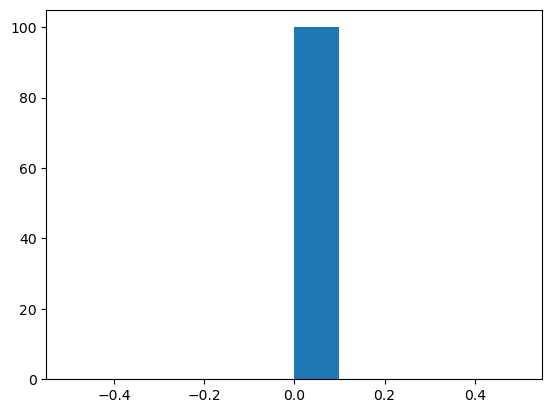

In [20]:
#用于简单过路灯模拟
#1.单直车道. 2.无车道转换。3.所有车假设为同一类车，也就是汽车动力学和汽车运动学一样
#作者lukeliuli@163.com
# -*- coding: utf-8 -*-
#https://sumo.dlr.de/pydoc/traci.html
"""
@author: lukeliuli@163.com
"""

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import os
import sys
import random

#import traci as libsumo
import libsumo
import matplotlib.pyplot as plt  

def simSumoCmdGreenTls(params):
    #print(params)
    simNum =  params["simNum"] #= 150
    redLightTime =  params["redLightTime"]# = 15
    otherVehs =   params["otherVehs"] #= [[1, 0],[7,0],[14,0]]  # [距离交通灯的距离1，行驶速度1,距离交通灯的距离2，行驶速度2]
    otherVehsParams =   params["otherVehsParams"] #= [5.5, 2, -9, 60 /3.6, 0.2]  # [车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距]
    objectVeh =  params["objectVeh"] #= [50, 0] 距离交通灯的距离,当前速度
    objectVehParams =  params["objectVehParams"] #= [5.5, 2, -9, 60 /3.6, 0.2]  # [车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距]
    
    nextTLSID = "2"
    trafficLightPos =200
    objvehID  = 'o1'
    routeID = 'platoon_route'
    typeID1 = 'EBUS'
    typeID2 = 'EBUS2'
    otherVehID = 'd'


    #####基本运行配置
    if 'SUMO_HOME' in os.environ:
        tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
        sys.path.append(tools)
    else:
        sys.exit("please declare environment variable 'SUMO_HOME'")
    
    path = os.getcwd()
    #path2 = path+"\sumoCfgs\my1Lane1Tls-server.sumocfg"#window
    path2 = path+"/sumoCfgs1/my1Lane1Tls-server.sumocfg"#linux
    sumoBinary = "sumo"
    
    libsumo.close()
    #libsumo.start(["sumo-gui", "-c", path2])
    libsumo.start([sumoBinary, "-c", path2,'--ignore-route-errors'])
    
    #####基本车辆参数设定
    
    
    
    
    
      
                            
                          
     # [车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距,不专心,速度噪声]                               
    length,maxAcc,maxDacc,maxSpeed,tau,minGap,imperfection,speedFactor = objectVehParams
    
    libsumo.vehicletype.setAccel(typeID1,maxAcc)  
    libsumo.vehicletype.setDecel(typeID1,maxDacc) 
    libsumo.vehicletype.setImperfection(typeID1,imperfection)
    libsumo.vehicletype.setLength(typeID1,length) 
    libsumo.vehicletype.setMaxSpeed(typeID1,maxSpeed)   
    libsumo.vehicletype.setMinGap(typeID1,minGap) 
    libsumo.vehicletype.setSpeedFactor(typeID1,speedFactor)  
    libsumo.vehicletype.setTau(typeID1,tau)  
  
                          
                            
    # [车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距,速度噪声]                         
    length,maxAcc,maxDacc,maxSpeed,tau,minGap,imperfection,speedFactor = otherVehsParams
    libsumo.vehicletype.setAccel(typeID2,maxAcc)  
    libsumo.vehicletype.setDecel(typeID2,maxDacc) 
    libsumo.vehicletype.setImperfection(typeID2,imperfection)
    libsumo.vehicletype.setLength(typeID2,length) 
    libsumo.vehicletype.setMaxSpeed(typeID2,maxSpeed)   
    libsumo.vehicletype.setMinGap(typeID2,minGap) 
    libsumo.vehicletype.setSpeedFactor(typeID2,speedFactor) 
    libsumo.vehicletype.setTau(typeID2,tau) 
                 
                            


                                 

    #greenTime = max(random.random()*greenTime,0.1)
    #交通灯设定为红灯逻辑
    allProgramLogics = libsumo.trafficlight.getAllProgramLogics(nextTLSID)
    lgc1 = allProgramLogics[0]
    yellowDurTime = lgc1.phases[0].duration
    greenDurTime = lgc1.phases[1].duration
    yellowDurTime = lgc1.phases[2].duration
    redDurTime = lgc1.phases[3].duration
    
    lgc1.phases[0].state = 'y'
    lgc1.phases[0].duration =yellowDurTime
    lgc1.phases[1].state = 'r'
    lgc1.phases[1].duration =redLightTime#修改绿灯时间
    
    lgc1.phases[2].state = 'y'
    lgc1.phases[2].duration =yellowDurTime
    
    lgc1.phases[3].state = 'G'
    lgc1.phases[3].duration =greenDurTime
    
    libsumo.trafficlight.setProgramLogic(nextTLSID,lgc1) 
    phaseDur = libsumo.trafficlight.getPhaseDuration(nextTLSID)
    
    """
    ####修改逻辑和红灯时间，随机参数
    redTime =  params["redTime"]#注意坐标的原点
    redTime = max(random.random()*redTime,0.1)
    allProgramLogics = libsumo.trafficlight.getAllProgramLogics(nextTLSID)
    lgc1 = allProgramLogics[0]
    yellowDurTime = lgc1.phases[0].duration

    lgc1.phases[1].state = 'r'
    redDurTime = lgc1.phases[1].duration

    yellowDurTime = lgc1.phases[2].duration

    lgc1.phases[3].state = 'G'
    greenDurTime = lgc1.phases[3].duration

    lgc1.phases[1].duration = redTime
    libsumo.trafficlight.setProgramLogic(nextTLSID,lgc1) 
    phaseDur = libsumo.trafficlight.getPhaseDuration(nextTLSID)
    
    
    veh = "00003"
    tlsList = libsumo.vehicle.getNextTLS(veh)
    tlsID_T, tlsIndex, dist, state = tlsList[0] 
    """
    requireStop =0 
    stepNum = 0
    libsumo.simulationStep()
    statRec1 = []
    minSpeed = 100000
    ##############################################################
    while requireStop == 0:
        if (stepNum == 0):
            dist,vel = objectVeh
            vel  = min(60/3.6,vel)
            libsumo.vehicle.add(objvehID, routeID, typeID=typeID1, depart='0', departLane='first', \
                        departPos=trafficLightPos-dist, departSpeed=str(vel))
            counter = 0
            for v in otherVehs:
                counter = counter+1
                dist,vel = v
                vel  = min(60/3.6,vel)
                #https://sumo.dlr.de/docs/Specification/index.html
                #https://sumo.dlr.de/docs/Networks/SUMO_Road_Networks.html
                libsumo.vehicle.add(otherVehID+str(counter), routeID, typeID=typeID2, depart='0', departLane='first', \
                                    departPos=str(trafficLightPos-dist), departSpeed=str(vel))
        
        libsumo.simulationStep()
        stepNum += 1

        ####https://sumo.dlr.de/daily/pydoc/traci._vehicle.html
        states = libsumo.trafficlight.getRedYellowGreenState(nextTLSID)
        timeT = libsumo.simulation.getCurrentTime()  # 当前时间
        nextSwitch = libsumo.trafficlight.getNextSwitch(nextTLSID)
        phaseName = libsumo.trafficlight.getPhaseName(nextTLSID)
        phase = libsumo.trafficlight.getPhase(nextTLSID)
        phaseDur = libsumo.trafficlight.getPhaseDuration(nextTLSID)
        curTime = timeT/1000
        phaseLeftTime = nextSwitch - curTime

        nextTLSNow= libsumo.vehicle.getNextTLS(objvehID)

        vehPos = libsumo.vehicle.getPosition(objvehID)[0]
        speed = libsumo.vehicle.getSpeed(objvehID)
        vehMaxSpeed = libsumo.vehicle.getMaxSpeed(objvehID)
        vehLanePos = libsumo.vehicle.getLanePosition(objvehID)

        laneID = libsumo.vehicle.getLaneID(objvehID)
        edgeID = libsumo.vehicle.getRoadID(objvehID)
        meanSpeed = libsumo.lane.getLastStepMeanSpeed(laneID)
        laneMaxSpeed = libsumo.lane.getMaxSpeed(laneID)

        vehMaxSpeed = min(vehMaxSpeed, laneMaxSpeed)

        dist2TLS = trafficLightPos-vehLanePos
        arrivalTime1 = min(100,dist / (speed + 0.001))
        arrivalTime2 = min(100,dist / vehMaxSpeed)


        passTLS = nextTLSNow==nextTLSID

        leaderID = libsumo.vehicle.getLeader(objvehID)
        if leaderID:
            leaderInfo = getVehicleInfo(leaderID[0])
        else:
            leaderInfo = None
        
        
        #if timeT> 40000:#毫秒ms
        #    print("simStop:timeT/1000 > 40")
        #    requireStop = 1
            
        if dist2TLS<=0.3: 
            print("simStop:dist2TLS<=0.3")
            requireStop = 1
            
            
        edgeIDNow =  libsumo.vehicle.getRoadID(objvehID)
        if edgeIDNow != "e1to2" or passTLS:  # if time is over 30 second stoping the simulation
            print("simStop:next tls,edge is %s,%s"% (nextTLSNow,libsumo.vehicle.getRoadID(objvehID)))
            requireStop = 1
            
            
      

        
        tmp = "running time(ms):%d,tls state: %s,duration:%.3f," % (timeT,states,phaseDur)
        strRec1 = tmp
        tmp = "speed:%.2f,lanePos:%s,dist2TLS:%.2f," % (speed,vehLanePos,dist2TLS)
        strRec1 = strRec1+tmp
        tmp = "edgeID is %s, TLS is %s," % (edgeIDNow,nextTLSNow)
        strRec1 = strRec1+tmp
        
        statRec1.append([states,phaseDur,timeT,passTLS,speed,vehLanePos,dist2TLS])
        
        if timeT>1000:#降低误差
            minSpeed = min(speed,minSpeed)
        
        if params["log"]:
            print(strRec1)  
            print("leadID：%s,leadInfo:%s" %(leaderID[0],leaderInfo))

    
    libsumo.close()
                  
    return statRec1,strRec1,minSpeed,leaderInfo 

def getVehicleInfo(objvehID):
    info ="No Veh"
    if len(objvehID) == 0:
        return info
     
    if objvehID:
        vehPos = libsumo.vehicle.getPosition(objvehID)[0]
        speed = libsumo.vehicle.getSpeed(objvehID)
        vehMaxSpeed = libsumo.vehicle.getMaxSpeed(objvehID)
        vehLanePos = libsumo.vehicle.getLanePosition(objvehID)
        laneID = libsumo.vehicle.getLaneID(objvehID)
        edgeID = libsumo.vehicle.getRoadID(objvehID)

        info = "ID:%s,vehPos:%.2f,speed:%.2f,vehLanePos:%s,laneID:%s,edgeID:%s," %(objvehID,vehPos,speed,vehLanePos,laneID,edgeID)

        TLSNow = libsumo.vehicle.getNextTLS(objvehID)
        if len(TLSNow)>0:
            name= TLSNow[0][0]
            phase= TLSNow[0][1]
            dist= TLSNow[0][3]
            tmp = "TLSName:%s,TLSPhase:%s,TLSDist:%s" %(name,phase,dist)
            info = info+tmp


    return info


############################################################################################
###测试程序1
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import pandas as pd
import numpy as np
import random
import os
import time
####获得一个样本进行测试
df1 = pd.read_csv('./trainData/france_0_allSamples1.csv')
#df1.head(5)
df2 = df1.loc[df1['redLightTime']>10]
df2 = df2.loc[df1['speedFlag'] ==3]
df2 = df2.loc[df1['vehPos_3'] >0]



randIndex = random.randint(0,len(df2))
tmp = df2.iloc[randIndex].values


vehID,redLightTime,distToRedLight,speed,laneAvgSpeed,arriveTime1,arriveTime2,numStillVeh,ArrivalDivRedTime,\
    vehPos_1,vehSpeed_1,vehPos_2,vehSpeed_2,vehPos_3,vehSpeed_3,vehPos_4,vehSpeed_4,vehPos_5,vehSpeed_5,\
    vehPos_6,vehSpeed_6,vehPos_7,vehSpeed_7,vehPos_8,vehSpeed_8,vehPos_9,vehSpeed_9,vehPos_10,vehSpeed_10,\
    vehPos_11,vehSpeed_11,vehPos_12,vehSpeed_12,vehPos_13,vehSpeed_13,vehPos_14,vehSpeed_14,vehPos_15,vehSpeed_15,\
    vehPos_16,vehSpeed_16,vehPos_17,vehSpeed_17,vehPos_18,vehSpeed_18,vehPos_19,vehSpeed_19,vehPos_20,vehSpeed_20,\
    speedFlag = tmp
vehObj = np.array([distToRedLight,speed])
vehsOthers = tmp[9:-1]
vehsOthers = vehsOthers.reshape(-1,2)
print(vehObj)
print(vehsOthers)
vehsOthers = vehsOthers[np.where(vehsOthers[:,0]>0)]
#print(vehsOthers)
redLightTime = redLightTime



time.sleep(5);
#####################################################################
params =dict()
params["simNum"] = 100
params["redLightTime"] = redLightTime
params["otherVehs"] = vehsOthers  # [[距离交通灯的距离1，行驶速度1],[距离交通灯的距离2，行驶速度2]]
                            
#[车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距,不专心,速度噪声]                              
params["otherVehsParams"] = [5,4,9,60/3.6,     0.5, 0.5 ,0.01,0.05] 
                            
params["objectVeh"] = vehObj
#[车辆长度，最大加速度,最大减加速度，最大速度，反应时间(0.01到0.1的传输延迟，0.2到0.5的执行延迟),最小间距,不专心,速度噪声]  
params["objectVehParams"] = [5,4,9,60/3.6,                       0.5,                           0.5,      0.01,  0.05] 
params["log"] = False
minSpeedList = []
import random
for i in range(params["simNum"]):
     
     #加入噪声
     params["otherVehsParams"] = [5,2+random.uniform(0,1),4,60/3.6,0.4+random.uniform(0,0.1), 0.5 ,0.01,0.05] 
     params["objectVehParams"] = [5,2+random.uniform(0,1),4,60/3.6,0.4+random.uniform(0,0.1), 0.5, 0.01,0.05] 
     statRec1,strRec1,minSpeed,leaderInfo = simSumoCmdGreenTls(params)
      
     
     print("\n simNum:%d" %i)
     print(strRec1)
     print(leaderInfo )
     print('minSpeed',minSpeed)
     minSpeedList.append(minSpeed)

minSpeedList1 = np.array(minSpeedList)

print("\n\n minSpeedList ,min:%.2f,max:%.2f,mean:%.2f" %(np.min(minSpeedList1),np.max(minSpeedList1),np.mean(minSpeedList1)))
speedSlot = ["[0,5/3.6]","[5/3.6,15/3.6]","[15/3.6,25/3.6]","[25/3.6,35/3.6]","[35/3.6,80/3.6]"]
print("origin speedFlag %d,speedSlot %s" %(speedFlag,speedSlot[speedFlag]))



plt.hist(minSpeedList)


In [ ]:
!conda install numba -y